<center><font color=white>Importing Packages<center></font color=white>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

<center><font color=white>import data and take a look again<center></font color=white>

In [2]:
df=pd.read_csv("ttc-bus-delay-data-2022.csv")
df.sample(10)

Date Route   Time        Day                Location  \
5375   28-Jan-22    55  06:30     Friday  DUNDAS AND HUMBER HILL   
13925   1-Apr-22   119  06:57     Friday          WILSON STATION   
20291  15-May-22   111  07:18     Sunday         KIPLING STATION   
5818   31-Jan-22   996  15:56     Monday  HAREFIELD AND ELMHURST   
24706  15-Jun-22    29  13:52  Wednesday          WILSON STATION   
22656   2-Jun-22    85  10:39   Thursday    SHEPPARD AND MCCOWAN   
4600   23-Jan-22    36  15:44     Sunday         FINCH AND ARROW   
30858  20-Jul-22    32  08:23  Wednesday       LAWRENCE AND PINE   
31250  21-Jul-22    41  18:09   Thursday  PIONEER VILLAGE STATIO   
5961    1-Feb-22   989  17:45    Tuesday      WESTON AND BELLVUE   

                    Incident  Min Delay  Min Gap Direction  Vehicle  
5375               Diversion        120      123         B     8098  
13925     Utilized Off Route         20       40         S     8182  
20291             Mechanical         26        0         N     8042  
5818   Operations - Operator         12       23         N     3635  
24706  Operations - Operator          9       18       NaN     9021  
22656              Diversion         30       60         E     8510  
4600              Mechanical          5       10         W     3572  
30858             Mechanical          9       19         E     1078  
31250  Operations - Operator         12       24         S     1404  
5961         Collision - TTC         13       26         S     8326

<center><font color=white>Getting the locational data where there has been more than 50 delays<center></font color=white>
<center><font color=white>Also writting the data to a .csv where I can extrapolate longatiude and latitude<center></font color=white>

In [3]:
b=df.Location.value_counts()
thresh=b.loc[lambda x:x>50]

locs=[]

for loc in thresh.index:
    
    locs.append(loc+",")

locs=pd.DataFrame(locs)

locs.to_csv("locs.csv",index=False)


<center><font color=white>Changing the series two be two seperate lists so they can become a DataFrame in the exact oreintation I need<center></font color=white>

In [4]:
loc=list(thresh.index)
counts=list(thresh.values)
dictionary={"Location":loc,"Counts":counts}
count_loc_df=pd.DataFrame(dictionary)
count_loc_df


Location  Counts
0          KENNEDY STATION     920
1          KIPLING STATION     879
2   PIONEER VILLAGE STATIO     815
3            FINCH STATION     774
4         EGLINTON STATION     757
..                     ...     ...
78      WARDEN AND STEELES      54
79   ELLESMERE AND MARKHAM      54
80  GREENWIN VILLAGE AND B      52
81               AVON LOOP      52
82    WESTON AND BRADSTOCK      52

[83 rows x 2 columns]

<center><font color=white>Using Geoapify, I got the locational data<center></font color=white>
<center><font color=white>https://www.geoapify.com/tools/geocoding-online<center></font color=white>
<center><font color=white>Also made small edits to one column, stripping the "," from the end of first column. This makes the merge easier<center></font color=white>

In [5]:
locdata=pd.read_csv("GeoCoded_Data.csv")
locdata["original_0"]=locdata["original_0"].str.rstrip(",")
locdata


original_0        lat        lon  \
0          KENNEDY STATION  43.732447 -79.263533   
1          KIPLING STATION  43.637532 -79.535604   
2   PIONEER VILLAGE STATIO  43.776869 -79.509575   
3            FINCH STATION  43.780468 -79.414841   
4         EGLINTON STATION  43.704793 -79.398711   
..                     ...        ...        ...   
78      WARDEN AND STEELES  43.807007 -79.321281   
79   ELLESMERE AND MARKHAM  43.776694 -79.231257   
80  GREENWIN VILLAGE AND B  43.792600 -79.440811   
81               AVON LOOP  43.681241 -79.476903   
82    WESTON AND BRADSTOCK  43.739201 -79.539598   

                                            formatted  \
0   Kennedy Station, Transway Crescent, Toronto, O...   
1   Kipling Station, 950 Kipling Avenue, Toronto, ...   
2   Pioneer Village Station, York University Heigh...   
3   Finch Station, Finch Bus Terminal, Toronto, ON...   
4   Eglinton Station, Eglinton Bus Terminal, Toron...   
..                                                ...   
78         Warden Avenue, Toronto, ON M1W 3Y1, Canada   
79  Ellesmere Road at Markham Road, Ellesmere Road...   
80  Greenwin Village Road, Village Gate, Toronto, ...   
81                 Avon Loop, Toronto, ON M6N, Canada   
82  Bradstock Road, Weston Road, Toronto, ON M9M 2...   

                              name    district  housenumber  \
0                  Kennedy Station         NaN          NaN   
1                  Kipling Station         NaN        950.0   
2          Pioneer Village Station  North York          NaN   
3                    Finch Station  North York          NaN   
4                 Eglinton Station         NaN          NaN   
..                             ...         ...          ...   
78                   Warden Avenue         NaN          NaN   
79  Ellesmere Road at Markham Road         NaN          NaN   
80           Greenwin Village Road  North York          NaN   
81                             NaN        York          NaN   
82                  Bradstock Road  North York          NaN   

                   street postcode                    suburb     city  \
0       Transway Crescent  M1K 3N7               Scarborough  Toronto   
1          Kipling Avenue  M9B 1A5                 Etobicoke  Toronto   
2                     NaN      NaN   York University Heights  Toronto   
3      Finch Bus Terminal  M2N 5S4                North York  Toronto   
4   Eglinton Bus Terminal  M4S 2C6          Yonge & Eglinton  Toronto   
..                    ...      ...                       ...      ...   
78          Warden Avenue  M1W 3Y1               Scarborough  Toronto   
79         Ellesmere Road  M1H 3B7               Scarborough  Toronto   
80           Village Gate  M2R 2S7                Willowdale  Toronto   
81              Avon Loop      M6N         Rockcliffe–Smythe  Toronto   
82            Weston Road  M9M 2T9  Humber River—Black Creek  Toronto   

              county    state state_code country country_code  confidence  \
0   Golden Horseshoe  Ontario         ON  Canada           ca    0.950000   
1   Golden Horseshoe  Ontario         ON  Canada           ca    0.950000   
2            Toronto  Ontario         ON  Canada           ca    0.857143   
3   Golden Horseshoe  Ontario         ON  Canada           ca    0.950000   
4   Golden Horseshoe  Ontario         ON  Canada           ca    0.950000   
..               ...      ...        ...     ...          ...         ...   
78  Golden Horseshoe  Ontario         ON  Canada           ca    0.000000   
79  Golden Horseshoe  Ontario         ON  Canada           ca    0.000000   
80  Golden Horseshoe  Ontario         ON  Canada           ca    0.552632   
81           Toronto  Ontario         ON  Canada           ca    0.000000   
82  Golden Horseshoe  Ontario         ON  Canada           ca    0.000000   

                     attribution    attribution_license  \
0   © OpenStreetMap contributors  Open Database License   
1   © OpenStreetMap contribut

<center><font color=white>Given that that intersection names were truncated, there were some errors in which the geocoder predicted cities such as calgary<center></font color=white>
<center><font color=white>We know the data is only city of Toronto, so I dropped all values that weren't relevant. The row count only went down by 5 (8 if not including suaga) as the geocoder was fairly efficient<center></font color=white>



In [6]:
newdata=locdata.merge(count_loc_df,left_on="original_0", right_on="Location")
#newdata=newdata[(newdata.city=="Toronto")|(newdata.city=="Mississauga")|(newdata.city=="Markham")]
newdata=newdata[(newdata.city=="Toronto")|(newdata.city=="Markham")]
newdata

original_0        lat        lon  \
0          KENNEDY STATION  43.732447 -79.263533   
1          KIPLING STATION  43.637532 -79.535604   
2   PIONEER VILLAGE STATIO  43.776869 -79.509575   
3            FINCH STATION  43.780468 -79.414841   
4         EGLINTON STATION  43.704793 -79.398711   
..                     ...        ...        ...   
78      WARDEN AND STEELES  43.807007 -79.321281   
79   ELLESMERE AND MARKHAM  43.776694 -79.231257   
80  GREENWIN VILLAGE AND B  43.792600 -79.440811   
81               AVON LOOP  43.681241 -79.476903   
82    WESTON AND BRADSTOCK  43.739201 -79.539598   

                                            formatted  \
0   Kennedy Station, Transway Crescent, Toronto, O...   
1   Kipling Station, 950 Kipling Avenue, Toronto, ...   
2   Pioneer Village Station, York University Heigh...   
3   Finch Station, Finch Bus Terminal, Toronto, ON...   
4   Eglinton Station, Eglinton Bus Terminal, Toron...   
..                                                ...   
78         Warden Avenue, Toronto, ON M1W 3Y1, Canada   
79  Ellesmere Road at Markham Road, Ellesmere Road...   
80  Greenwin Village Road, Village Gate, Toronto, ...   
81                 Avon Loop, Toronto, ON M6N, Canada   
82  Bradstock Road, Weston Road, Toronto, ON M9M 2...   

                              name    district  housenumber  \
0                  Kennedy Station         NaN          NaN   
1                  Kipling Station         NaN        950.0   
2          Pioneer Village Station  North York          NaN   
3                    Finch Station  North York          NaN   
4                 Eglinton Station         NaN          NaN   
..                             ...         ...          ...   
78                   Warden Avenue         NaN          NaN   
79  Ellesmere Road at Markham Road         NaN          NaN   
80           Greenwin Village Road  North York          NaN   
81                             NaN        York          NaN   
82                  Bradstock Road  North York          NaN   

                   street postcode                    suburb  ...    state  \
0       Transway Crescent  M1K 3N7               Scarborough  ...  Ontario   
1          Kipling Avenue  M9B 1A5                 Etobicoke  ...  Ontario   
2                     NaN      NaN   York University Heights  ...  Ontario   
3      Finch Bus Terminal  M2N 5S4                North York  ...  Ontario   
4   Eglinton Bus Terminal  M4S 2C6          Yonge & Eglinton  ...  Ontario   
..                    ...      ...                       ...  ...      ...   
78          Warden Avenue  M1W 3Y1               Scarborough  ...  Ontario   
79         Ellesmere Road  M1H 3B7               Scarborough  ...  Ontario   
80           Village Gate  M2R 2S7                Willowdale  ...  Ontario   
81              Avon Loop      M6N         Rockcliffe–Smythe  ...  Ontario   
82            Weston Road  M9M 2T9  Humber River—Black Creek  ...  Ontario   

   state_code country country_code confidence                   attribution  \
0          ON  Canada           ca   0.950000  © OpenStreetMap contributors   
1          ON  Canada           ca   0.950000  © OpenStreetMap contributors   
2          ON  Canada           ca   0.857143  © OpenStreetMap contributors   
3          ON  Canada           ca   0.950000  © OpenStreetMap contributors   
4          ON  Canada           ca   0.950000  © OpenStreetMap contributors   
..        ...     ...          ...        ...                           ...   
78         ON  Canada           ca   0.000000  © OpenStreetMap contributors   
79         ON  Canada           ca   0.000000  © OpenStreetMap contributors   
80         ON  Canada           ca   0.552632  © OpenStreetMap contributors   
81         ON  Canada           ca   0.000000  © OpenStreetMap contributors   
82         ON  Canada           ca   0.000000  © OpenStreetMap contributors   

      attribution_license                          attribution_

<center><font color=white>Mutated Dataframe to include Geometry<center></font color=white>


In [7]:
crs=4326
geometry = [Point(xy) for xy in zip(newdata['lon'], newdata['lat'])]
geo_df = gpd.GeoDataFrame(newdata, 
                          crs = crs, 
                          geometry = geometry)

geo_df

original_0        lat        lon  \
0          KENNEDY STATION  43.732447 -79.263533   
1          KIPLING STATION  43.637532 -79.535604   
2   PIONEER VILLAGE STATIO  43.776869 -79.509575   
3            FINCH STATION  43.780468 -79.414841   
4         EGLINTON STATION  43.704793 -79.398711   
..                     ...        ...        ...   
78      WARDEN AND STEELES  43.807007 -79.321281   
79   ELLESMERE AND MARKHAM  43.776694 -79.231257   
80  GREENWIN VILLAGE AND B  43.792600 -79.440811   
81               AVON LOOP  43.681241 -79.476903   
82    WESTON AND BRADSTOCK  43.739201 -79.539598   

                                            formatted  \
0   Kennedy Station, Transway Crescent, Toronto, O...   
1   Kipling Station, 950 Kipling Avenue, Toronto, ...   
2   Pioneer Village Station, York University Heigh...   
3   Finch Station, Finch Bus Terminal, Toronto, ON...   
4   Eglinton Station, Eglinton Bus Terminal, Toron...   
..                                                ...   
78         Warden Avenue, Toronto, ON M1W 3Y1, Canada   
79  Ellesmere Road at Markham Road, Ellesmere Road...   
80  Greenwin Village Road, Village Gate, Toronto, ...   
81                 Avon Loop, Toronto, ON M6N, Canada   
82  Bradstock Road, Weston Road, Toronto, ON M9M 2...   

                              name    district  housenumber  \
0                  Kennedy Station         NaN          NaN   
1                  Kipling Station         NaN        950.0   
2          Pioneer Village Station  North York          NaN   
3                    Finch Station  North York          NaN   
4                 Eglinton Station         NaN          NaN   
..                             ...         ...          ...   
78                   Warden Avenue         NaN          NaN   
79  Ellesmere Road at Markham Road         NaN          NaN   
80           Greenwin Village Road  North York          NaN   
81                             NaN        York          NaN   
82                  Bradstock Road  North York          NaN   

                   street postcode                    suburb  ... state_code  \
0       Transway Crescent  M1K 3N7               Scarborough  ...         ON   
1          Kipling Avenue  M9B 1A5                 Etobicoke  ...         ON   
2                     NaN      NaN   York University Heights  ...         ON   
3      Finch Bus Terminal  M2N 5S4                North York  ...         ON   
4   Eglinton Bus Terminal  M4S 2C6          Yonge & Eglinton  ...         ON   
..                    ...      ...                       ...  ...        ...   
78          Warden Avenue  M1W 3Y1               Scarborough  ...         ON   
79         Ellesmere Road  M1H 3B7               Scarborough  ...         ON   
80           Village Gate  M2R 2S7                Willowdale  ...         ON   
81              Avon Loop      M6N         Rockcliffe–Smythe  ...         ON   
82            Weston Road  M9M 2T9  Humber River—Black Creek  ...         ON   

   country country_code confidence                   attribution  \
0   Canada           ca   0.950000  © OpenStreetMap contributors   
1   Canada           ca   0.950000  © OpenStreetMap contributors   
2   Canada           ca   0.857143  © OpenStreetMap contributors   
3   Canada           ca   0.950000  © OpenStreetMap contributors   
4   Canada           ca   0.950000  © OpenStreetMap contributors   
..     ...          ...        ...                           ...   
78  Canada           ca   0.000000  © OpenStreetMap contributors   
79  Canada           ca   0.000000  © OpenStreetMap contributors   
80  Canada           ca   0.552632  © OpenStreetMap contributors   
81  Canada           ca   0.000000  © OpenStreetMap contributors   
82  Canada           ca   0.000000  © OpenStreetMap contributors   

      attribution_license                          attribution_url  \
0   Open Database License  https://www.openstreetmap.org/copyright   
1   Open Database License  http

<center><font color=white>Final Result! Map with all the painpoints in Toronto (+markham)<center></font color=white>
<center><font color=white>Looking closely... majority of the delays are rooted in the stops where it connexts to Metrolinx!<center></font color=white>

Text(0.5, 1.0, 'TTC Pain Points')

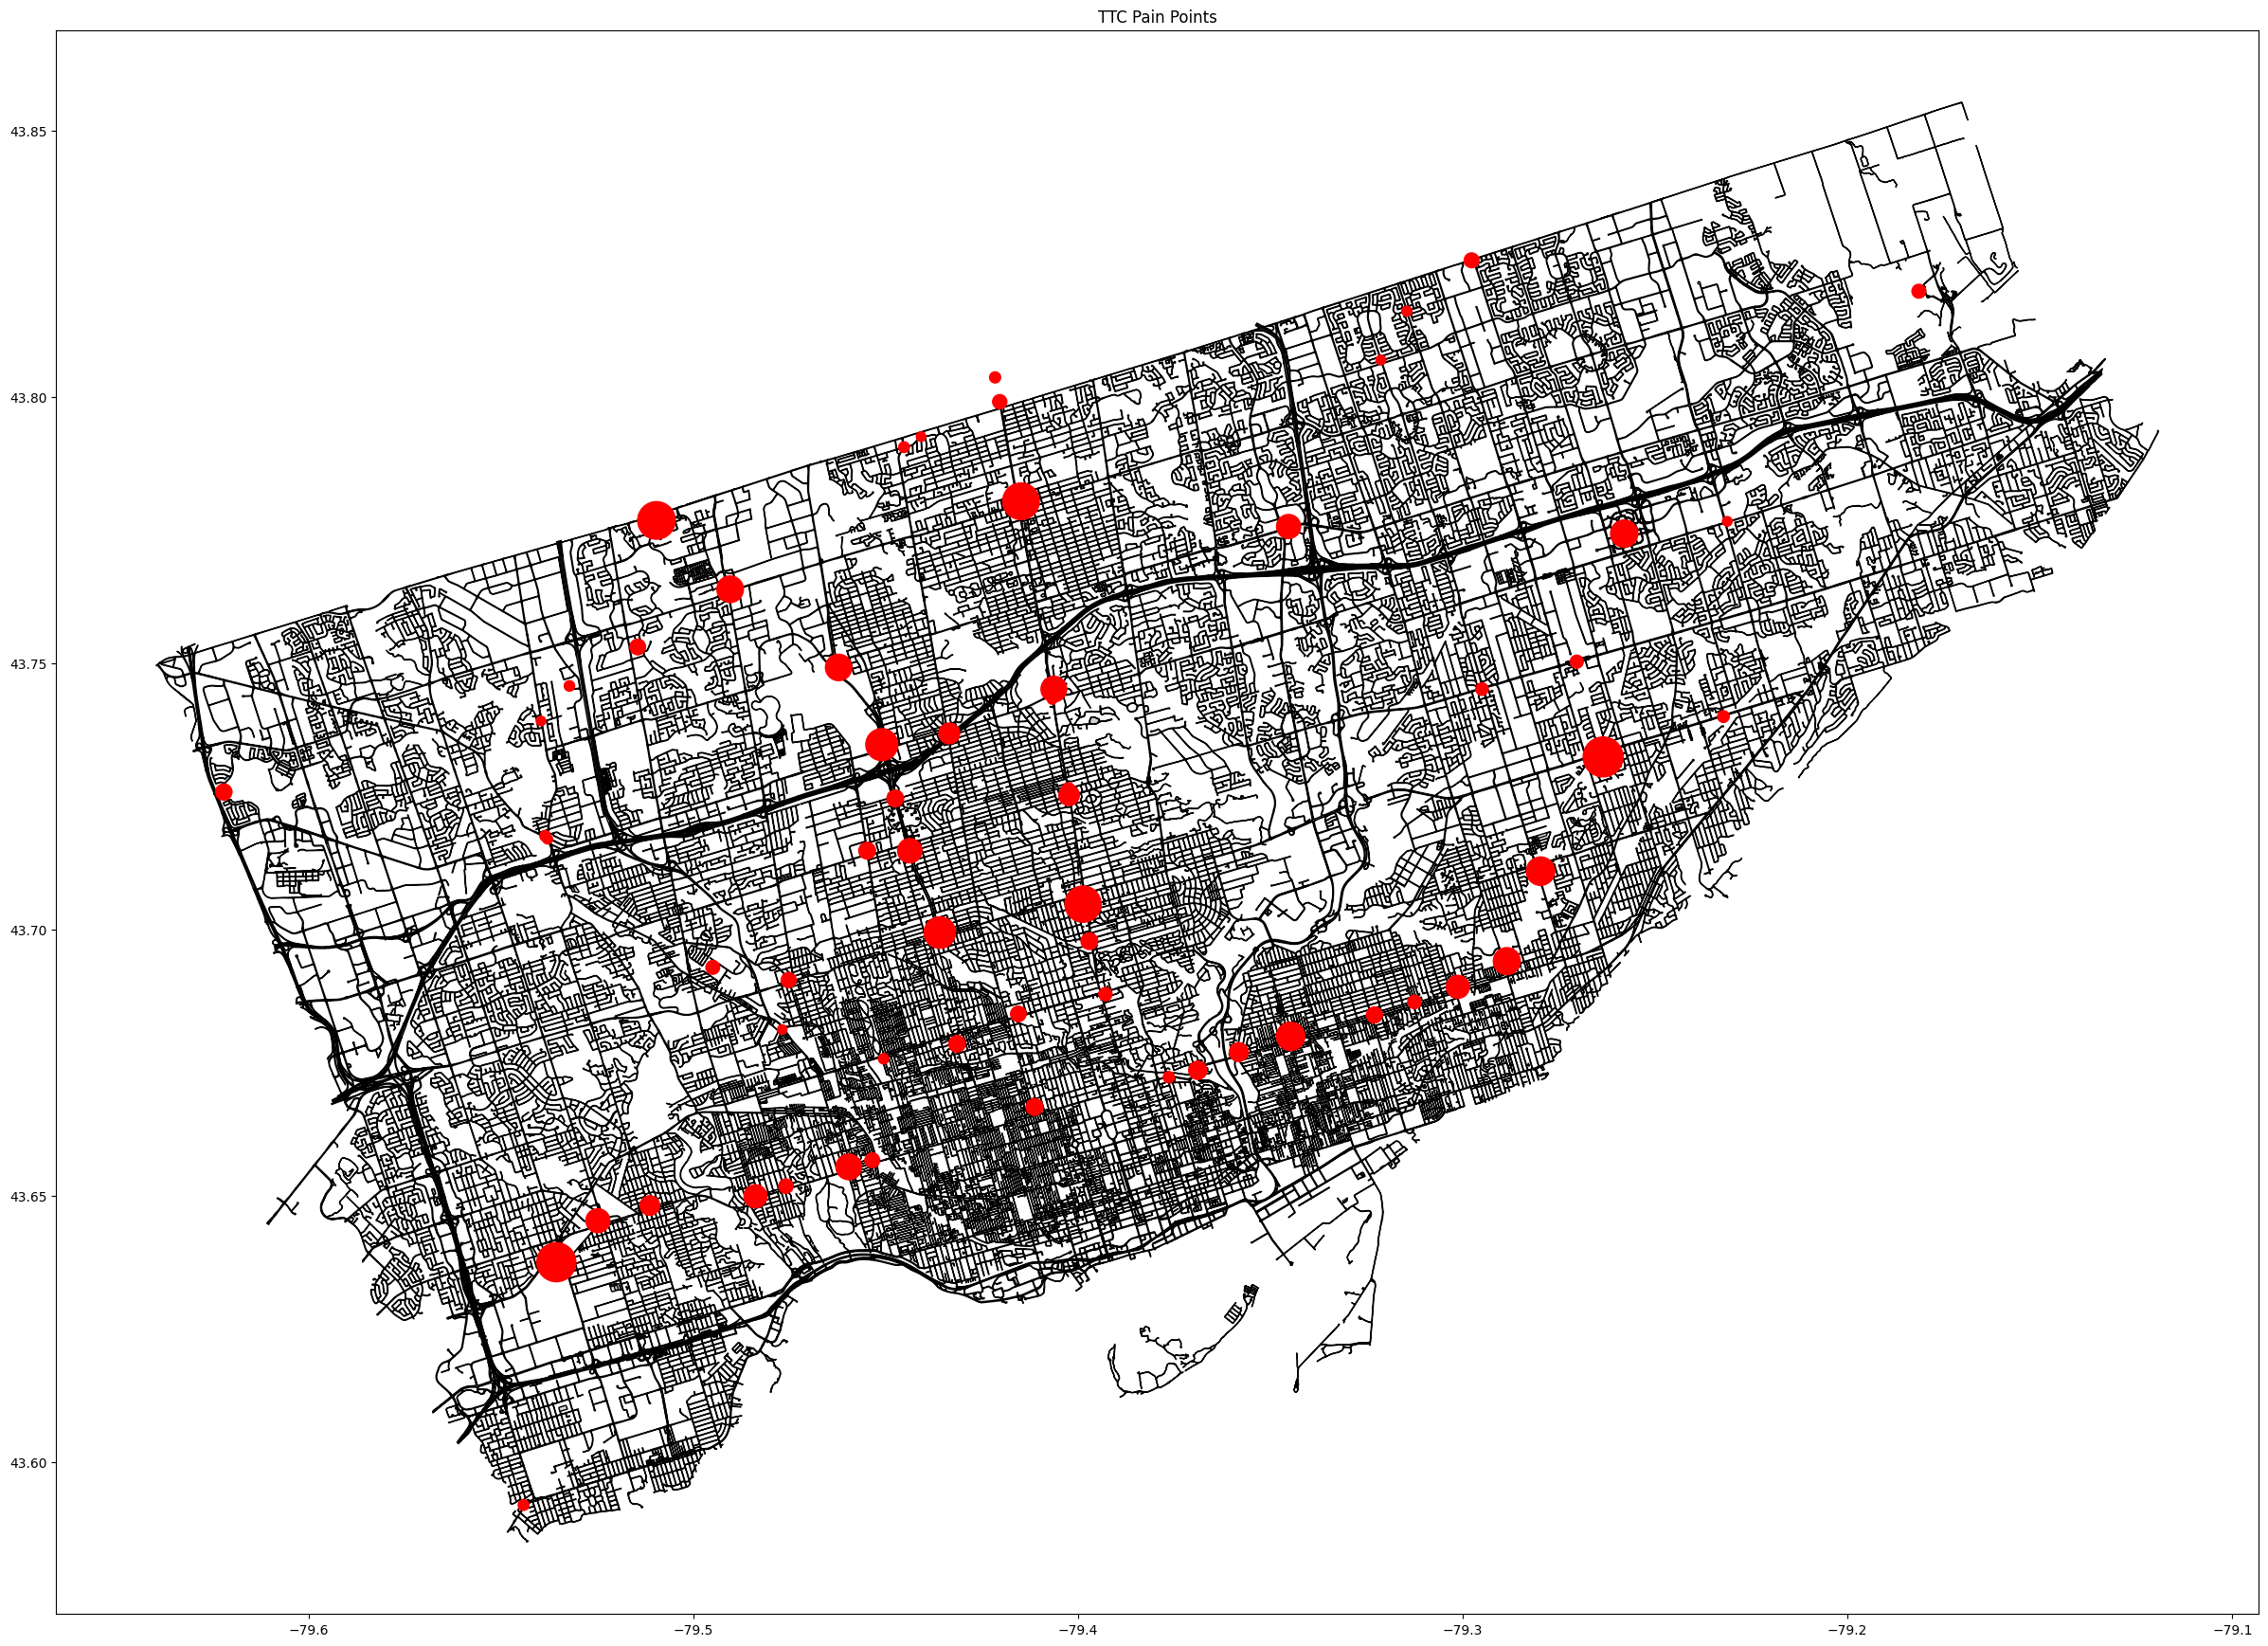

In [8]:
toronto=gpd.read_file("Edge of Road - WGS84/TOPO_EDGE_OF_ROAD_WGS84.shp")
fig, ax = plt.subplots(figsize = (30,30))
toronto.to_crs(epsg=4326).plot(ax=ax, color='lightgrey',edgecolor="black")
geo_df.plot(ax=ax, markersize="Counts", color="red")
ax.set_title('TTC Pain Points')